# <center> <b> Statistical Analysis on factors influencing Car Price</b> </center>

###  Problem Statement
A Chinese automobile company plans to enter the US market by setting up a local manufacturing unit and producing cars to compete with established US and European car manufacturers. The company aims to understand the factors that significantly influence car prices in the American market, as these factors may differ from those in the Chinese market. To achieve this, the company has engaged an automobile consulting firm that has collected a comprehensive dataset through various market surveys. The goal is to develop a predictive model for car prices using the available independent variables.

### Objective
The objective of this project is to build a regression model that accurately predicts the price of cars based on a set of independent variables. The model will help the management:

1.Identify significant factors that influence car prices in the US market.

2.Understand the relationship between these factors and car prices.

3.Use this understanding to make informed decisions about car design, pricing strategies, and other business strategies to effectively compete in the US market.

### Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Ignore warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
# Downloading the dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Data Analysis

In [4]:
#Display the first few rows of the dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Display the last few rows of the dataset
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
#Display concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


### Understand the distribution of Data

In [8]:
#To display the statistical summary for each numerical column numerical columns within the DataFrame
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
#To check if there are any missing values in dataset
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#To check if there are any missing values in dataset
df.notnull().sum()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

### Checking for Duplicates

In [11]:
#To check if there are any duplicates in dataset
df.duplicated().sum()

0

### Check the Shape of Dataset

In [12]:
#To check the shape of a DataFrame df
df.shape

(205, 26)

##### There are 205 rows and 26 columns

In [13]:
#To display column labels of DataFrame
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
# Check for unique values and lengths in each feature.
unique_values = {col: (df[col].unique(), len(df[col].unique())) for col in df.columns}

print("Unique values in each feature:")
for col, (values, length) in unique_values.items():
    print(f"Feature '{col}': Number of unique values: {length} -  Unique values: {values}")

Unique values in each feature:
Feature 'car_ID': Number of unique values: 205 -  Unique values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Feature 'symboling': Number of unique values: 6 -  Unique values: [ 3  

In [15]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

Categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [16]:
# Check unique values in each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}\n")


Column: CarName
Unique values: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'bu

In [17]:
# Summary of unique values count in each categorical column
unique_values_count = df[categorical_columns].nunique()
print(f"Unique values count in each categorical column:\n{unique_values_count}")


Unique values count in each categorical column:
CarName           147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64


### Data Preprocessing

In [18]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


The dataset has been checked before for duplicates and confirmed to have none.
Therefore, no need to drop duplicates or reset the index.


In [19]:
#dropping irrelevant column 'Car_id'
df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [20]:
# Splitting company name from CarName column
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
# Insert column "CompanyName" at the 3rd position (index 2) in the DataFrame.
df.insert(2,"CompanyName",CompanyName)
df.head()

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
# Drop the 'CarName' column from the DataFrame.
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
# Check unique values in CompanyName
unique_company_names = df['CompanyName'].unique()
print(f"Unique company names: {unique_company_names}")

Unique company names: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [24]:
# Check the count of each unique company name
company_name_counts = df['CompanyName'].value_counts()
print(f"\nCount of each unique company name:\n{company_name_counts}")


Count of each unique company name:
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64


there is a spelling error in the CompanyName column and  need to correct it,we can use the replace method in pandas

In [25]:
# Convert all values in CompanyName to lower case
df['CompanyName'] = df['CompanyName'].str.lower()
df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
# Correct the misspelled company names
replacements = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'alfa-romero': 'alfa romeo'
}

df['CompanyName'] = df['CompanyName'].replace(replacements)

df.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
# Check unique values in CompanyName
unique_company_names = df['CompanyName'].unique()
print(f"Unique company names: {unique_company_names}")

Unique company names: ['alfa romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [28]:
# Define mapping dictionaries
cylinder_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
doornumber_mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5}



In [29]:
# Convert 'cylindernumber' column from string to integer
df['cylindernumber'] = df['cylindernumber'].replace(cylinder_mapping)
df

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa romeo,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa romeo,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [30]:
# Convert 'doornumber' column from string to integer
df['doornumber'] = df['doornumber'].replace(doornumber_mapping)
df.head(15)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa romeo,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa romeo,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa romeo,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi,gas,std,2,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi,gas,std,4,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Identify Numerical and Categorical columns

In [31]:
#separate numerical and categorical variables

numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

#dispaly the lists
print('Numerical columns:', numerical_cols)
print('Categorical columns:', categorical_cols)

Numerical columns: ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Categorical columns: ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


#### Out of 25 columns,17 are numerical and 8 are categorical

In [32]:
#To understand the distribution of categorical data 
df.describe(include="object").T

,count,unique,top,freq
CompanyName,205,22,toyota,32
fueltype,205,2,gas,185
aspiration,205,2,std,168
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
fuelsystem,205,8,mpfi,94


#### Finding 1.count: Number of non-null entries.2.unique: Number of unique values in the column.3.top: The most common value in the column.4.freq: The most common value's frequency  from categorical columns


In [33]:
#To understand the distribution of Numerical data 
df.describe(include="int").T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
doornumber,205.0,3.121951,0.994966,2.0,2.0,4.0,4.0,4.0
curbweight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
cylindernumber,205.0,4.380488,1.080854,2.0,4.0,4.0,4.0,12.0
enginesize,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
horsepower,205.0,104.117073,39.544167,48.0,70.0,95.0,116.0,288.0
peakrpm,205.0,5125.121951,476.985643,4150.0,4800.0,5200.0,5500.0,6600.0
citympg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highwaympg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


### Visualization

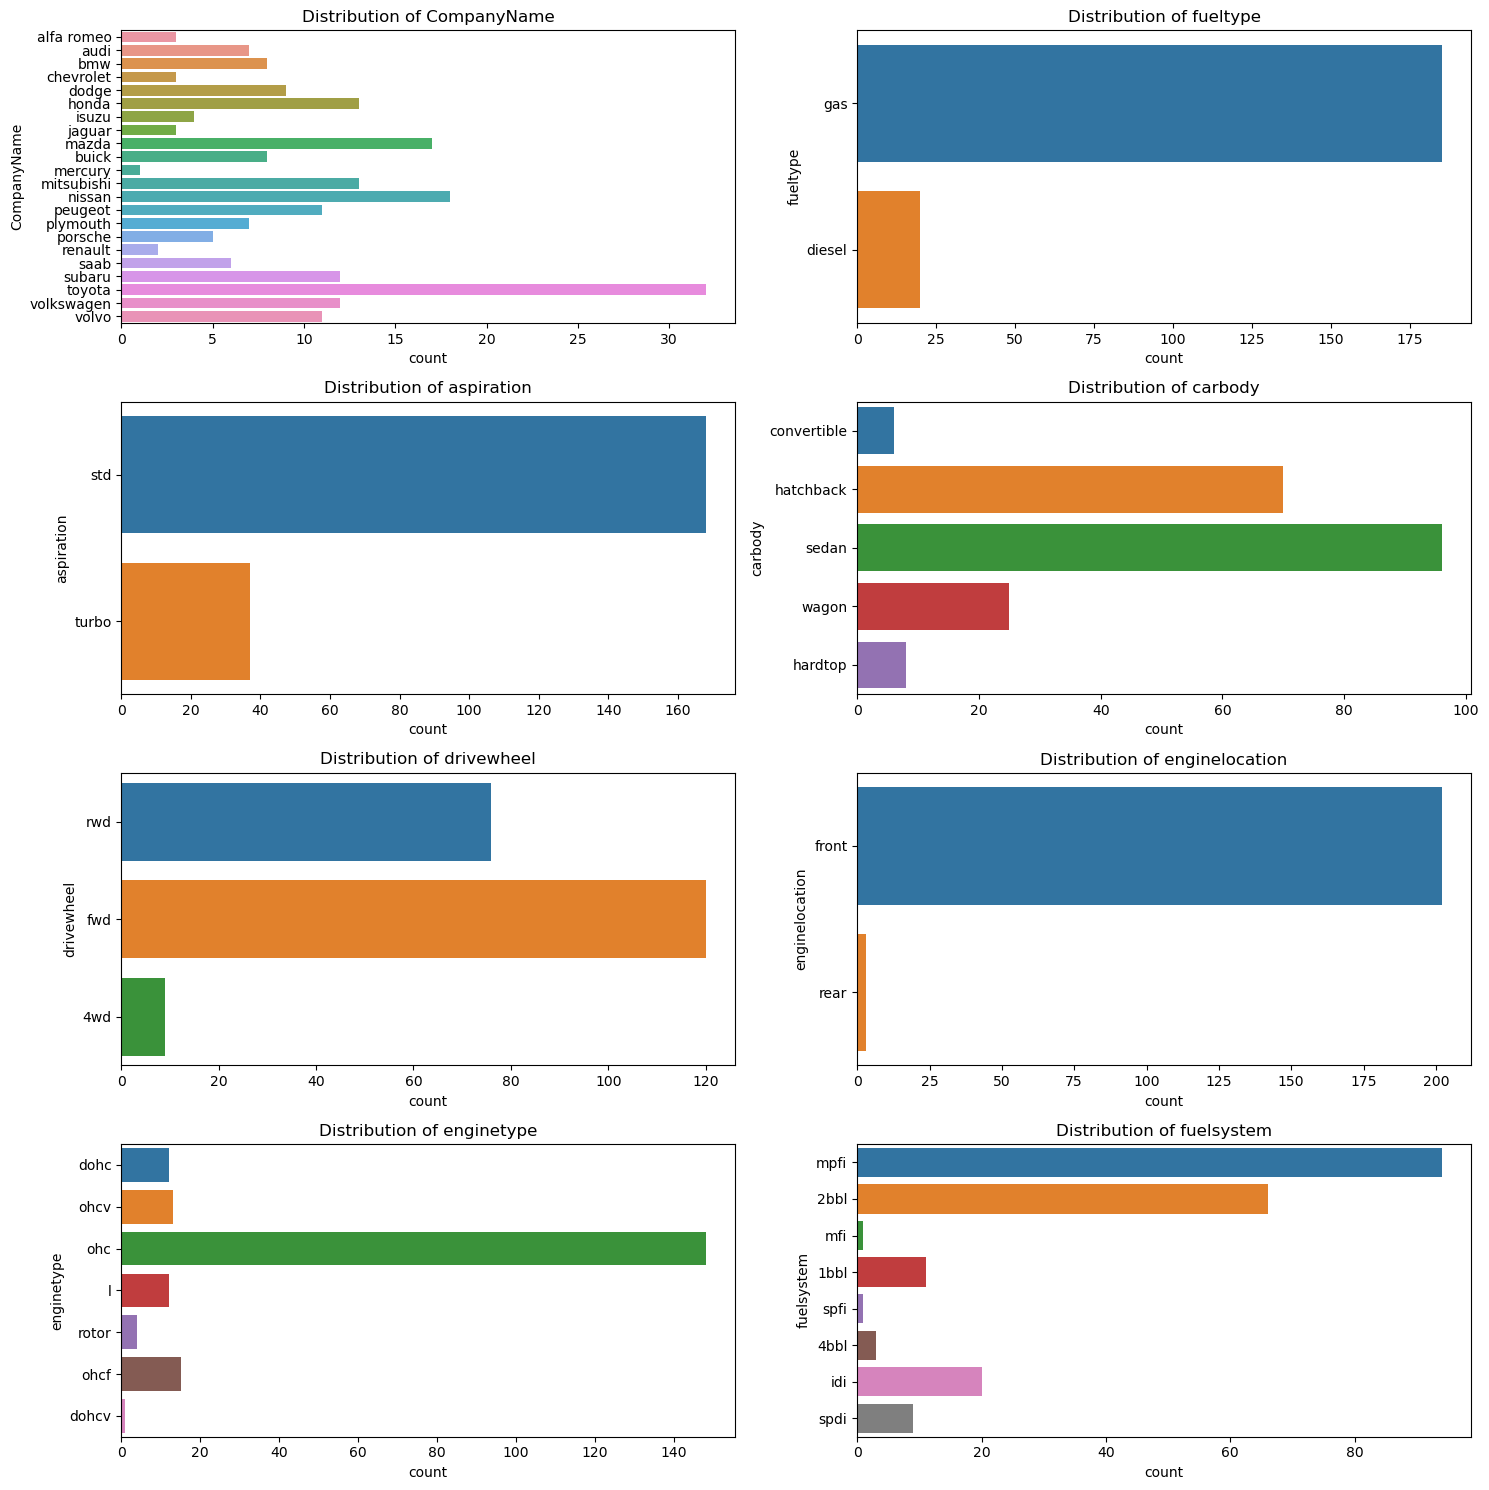

In [34]:
# Plot the distribution of each categorical column
fig, axes = plt.subplots(4,2 ,figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

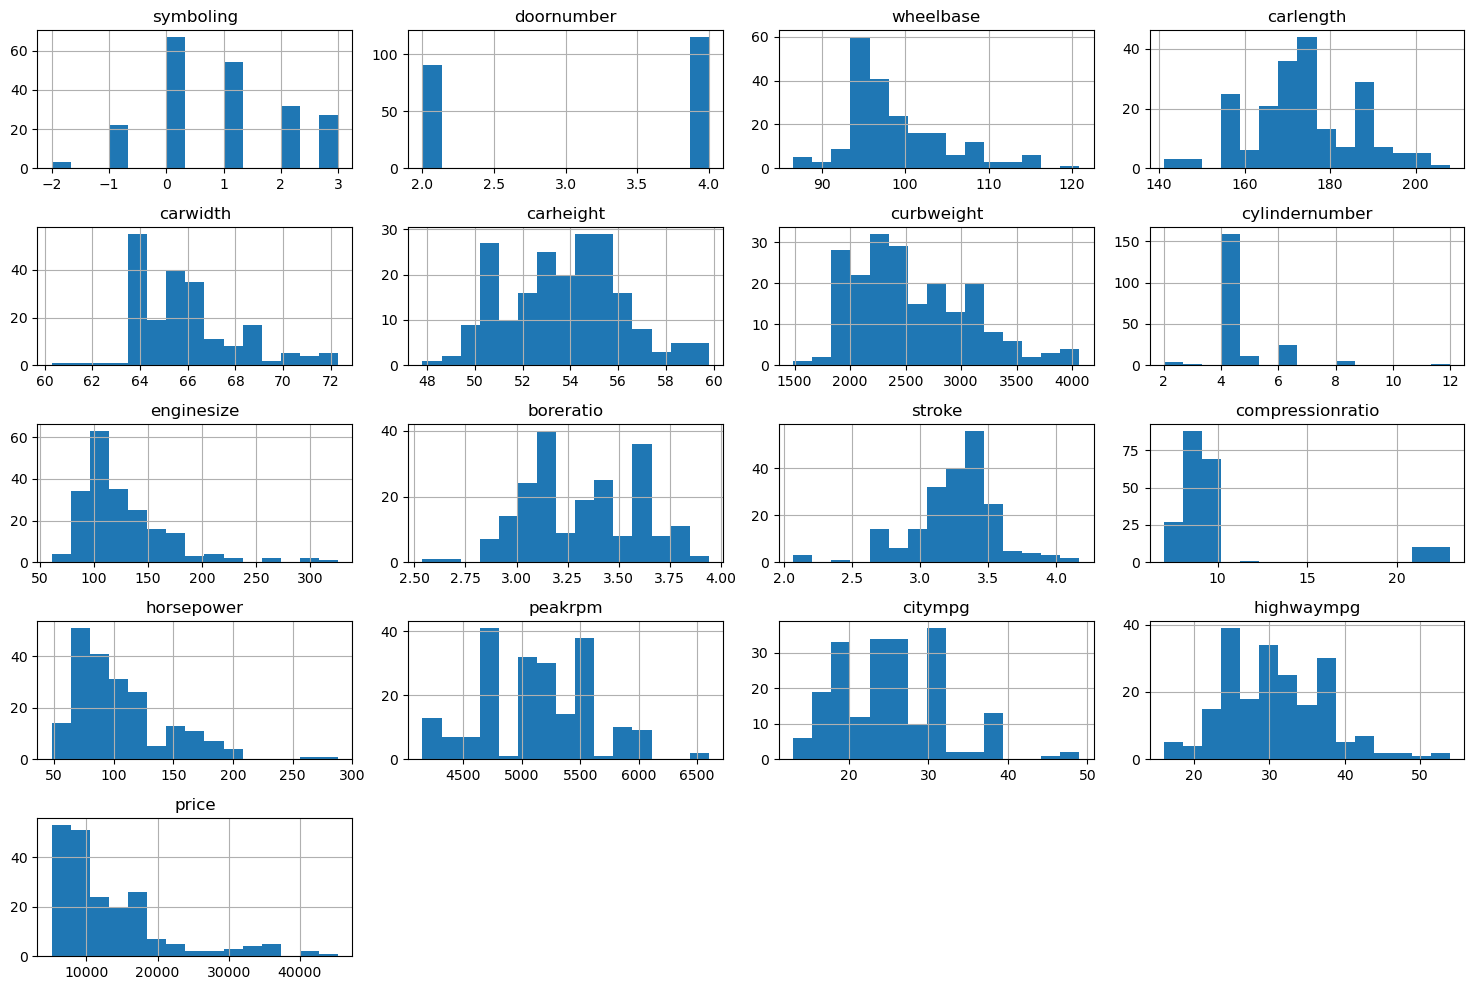

In [35]:
# Histogram for numerical columns
df[numerical_cols].hist(bins=15,figsize=(15,10),layout=(5,4))
plt.tight_layout()
plt.show()


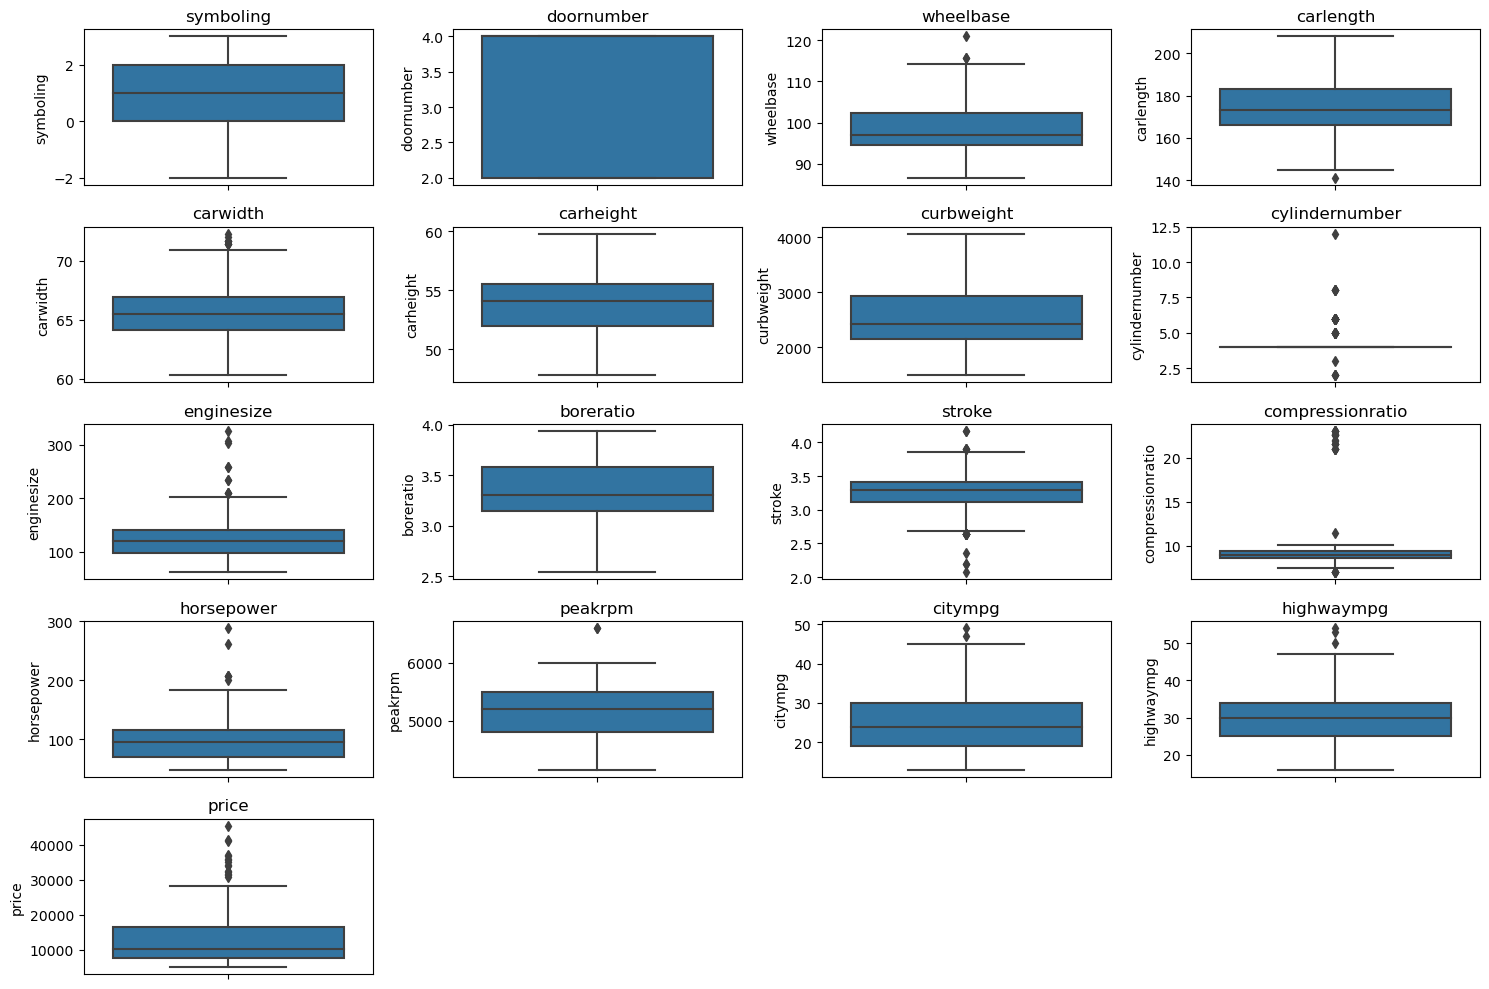

In [36]:
#Box plot to identify outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

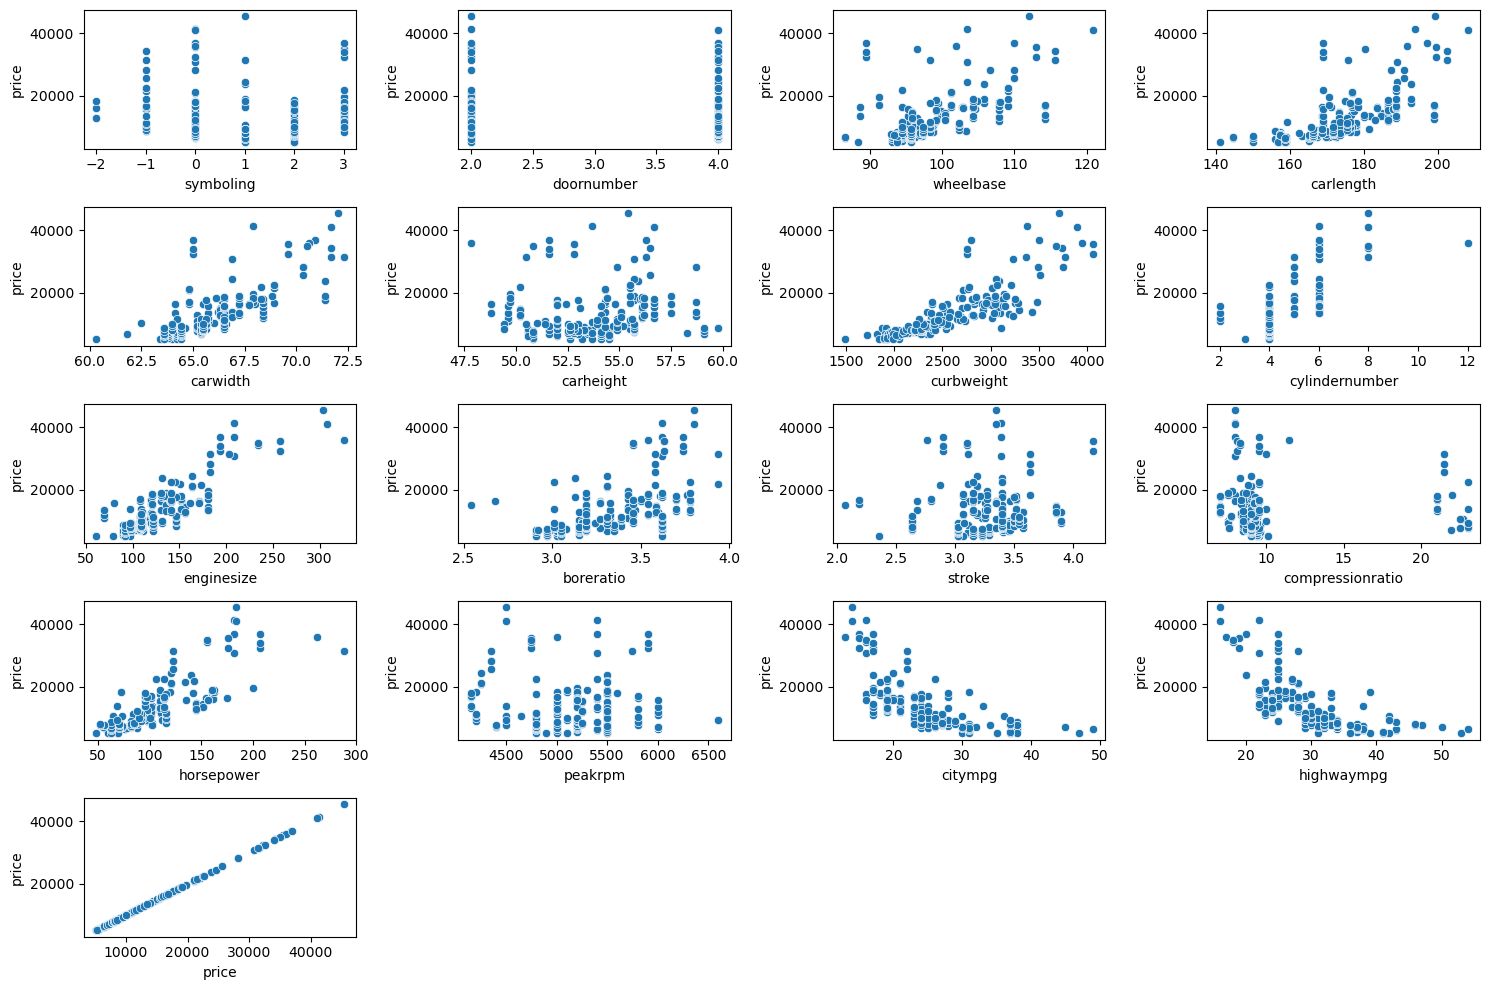

In [37]:
# scatter plot to visualize relationship between target variable ('price') & numerical variables
plt.figure(figsize=(15,10))
for i,col in enumerate (numerical_cols):
    plt.subplot(5,4,i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

By visualizing the scatter plots for each feature against price, we can identify which features are strongly correlated with the target feature. These features can then be selected for building predictive models to estimate the price.

This approach not only aids in feature selection but also provides a visual understanding of the data, which is crucial for effective data analysis and model building

### Feature Selection

In [38]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()
correlation_matrix

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


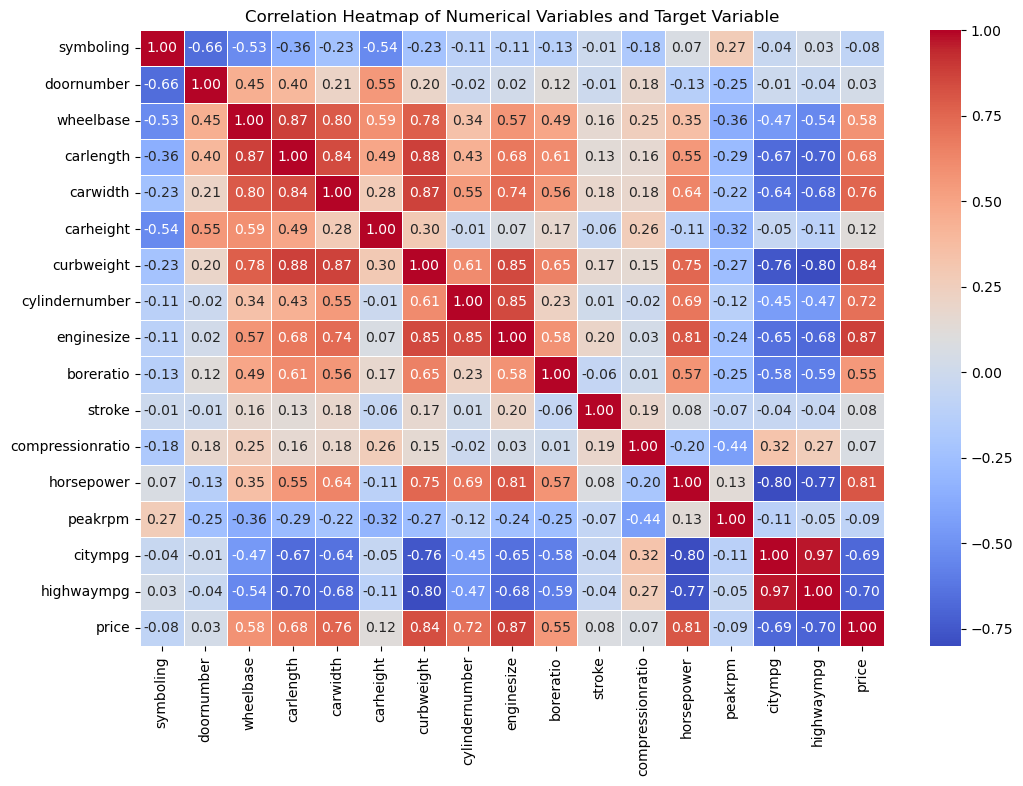

In [39]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

To understand which features have a linear relationship with the target feature (price) and to detect multicollinearity among the predictor features using a heatmap.
1.Linear Relationship with Target:

>By examining the correlation coefficients between each input feature and the target feature (price), we can identify which features are linearly related to the target.
>Higher absolute values of the correlation coefficient indicate a stronger linear relationship.

2.Multicollinearity:

>Multicollinearity occurs when two or more input features are highly correlated with each other.
>This can cause issues in  models, as it can inflate the variance of the coefficient estimates and make the model less interpretable.

where highly correlated columns (where correlation>0.85)
citympg,highwaympg
curbweight,enginesize
curbweight,carlength
curbweight,carwidth
wheelbase,carlength

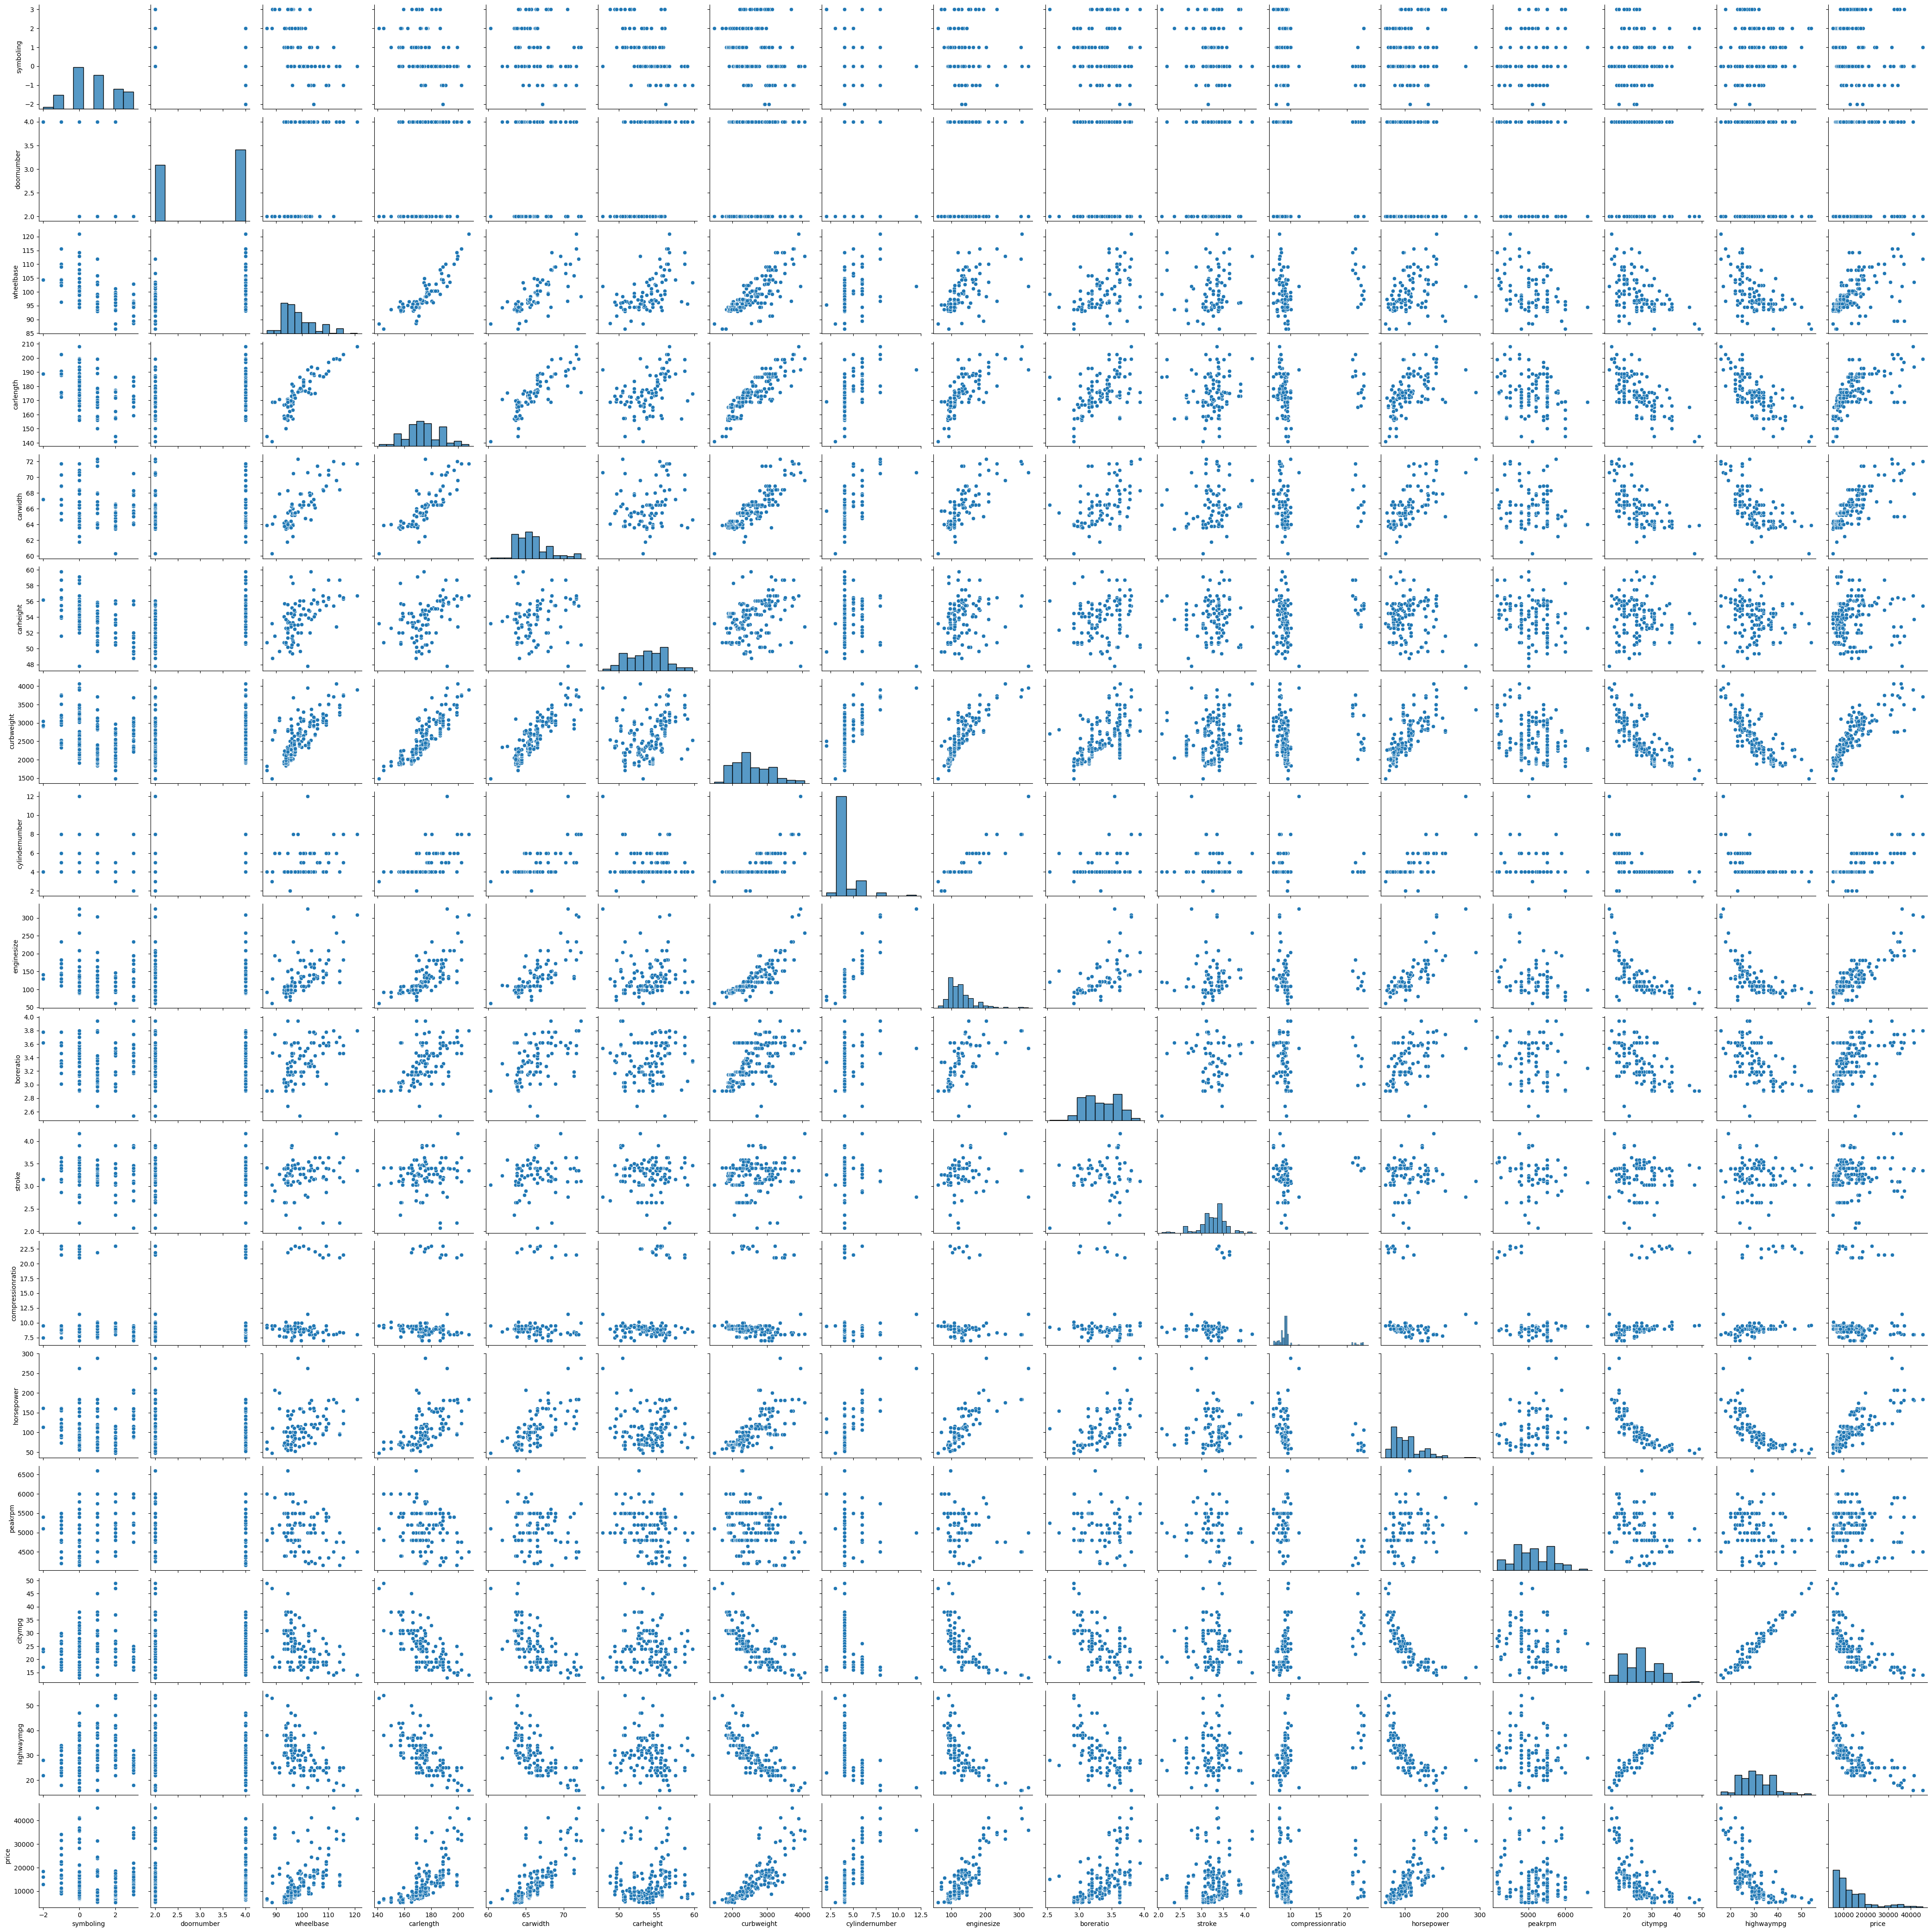

In [40]:
#pairwise scatter plot and observe linear relationships.
    
# Select only numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot pair plot
sns.pairplot(numerical_cols)
plt.show()

<Axes: xlabel='wheelbase', ylabel='carlength'>

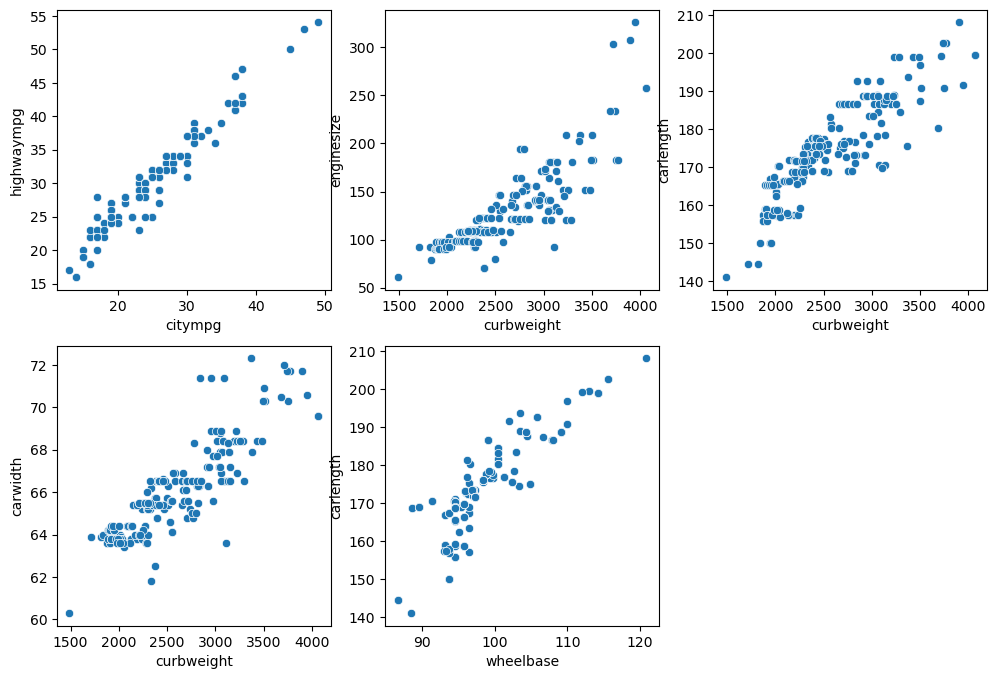

In [41]:
plt.figure(figsize=(12, 8))
plt.subplot(2,3,1)
sns.scatterplot(data=df,x='citympg',y='highwaympg')

plt.subplot(2,3,2)
sns.scatterplot(data=df,x='curbweight',y='enginesize')

plt.subplot(2,3,3)
sns.scatterplot(data=df,x='curbweight',y='carlength')

plt.subplot(2,3,4)
sns.scatterplot(data=df,x='curbweight',y='carwidth')

plt.subplot(2,3,5)
sns.scatterplot(data=df,x='wheelbase',y='carlength')

Multicollinearity refers to the phenomenon where two or more predictor variables in a regression model are highly correlated, meaning that they contain similar information about the variance in the dependent variable. High multicollinearity can lead to difficulties in estimating the relationships between predictors and the outcome variable, which can result in less reliable and unstable estimates of regression coefficients.
##### We can drop 'highwaympg','curbweight','wheelbase'

In [42]:
df1=df.copy()

In [43]:
#dropping 'highwaympg','curbweight','wheelbase'
df1.drop(['highwaympg','curbweight','wheelbase'],axis=1,inplace=True)

In [44]:
#dropping 'enginelocation','symboling'
df1.drop(['enginelocation','symboling'],axis=1,inplace=True)

### OUTLIER TREATMENT

In [45]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

The whisker function calculates the lower and upper whiskers for a given dataset column based on the interquartile range (IQR). Specifically, it first computes the 25th percentile (Q1) and the 75th percentile (Q3) of the data. The interquartile range (IQR) is then determined by subtracting Q1 from Q3. The function subsequently calculates the lower whisker (LW) as Q1 minus 1.5 times the IQR and the upper whisker (UW) as Q3 plus 1.5 times the IQR. These whiskers are used in box plots to identify potential outliers; data points lying outside the range defined by the lower and upper whiskers are considered outliers. The function returns the calculated lower and upper whisker values, facilitating the detection of outliers in the dataset.

In [46]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i]) 

The code iterates through each numerical column in the DataFrame and applies the whisker function to calculate the lower (lw) and upper (uw) whiskers, which are thresholds often determined using the interquartile range (IQR). For each value in the column, it replaces those below the lower whisker with the lower whisker value and those above the upper whisker with the upper whisker value.

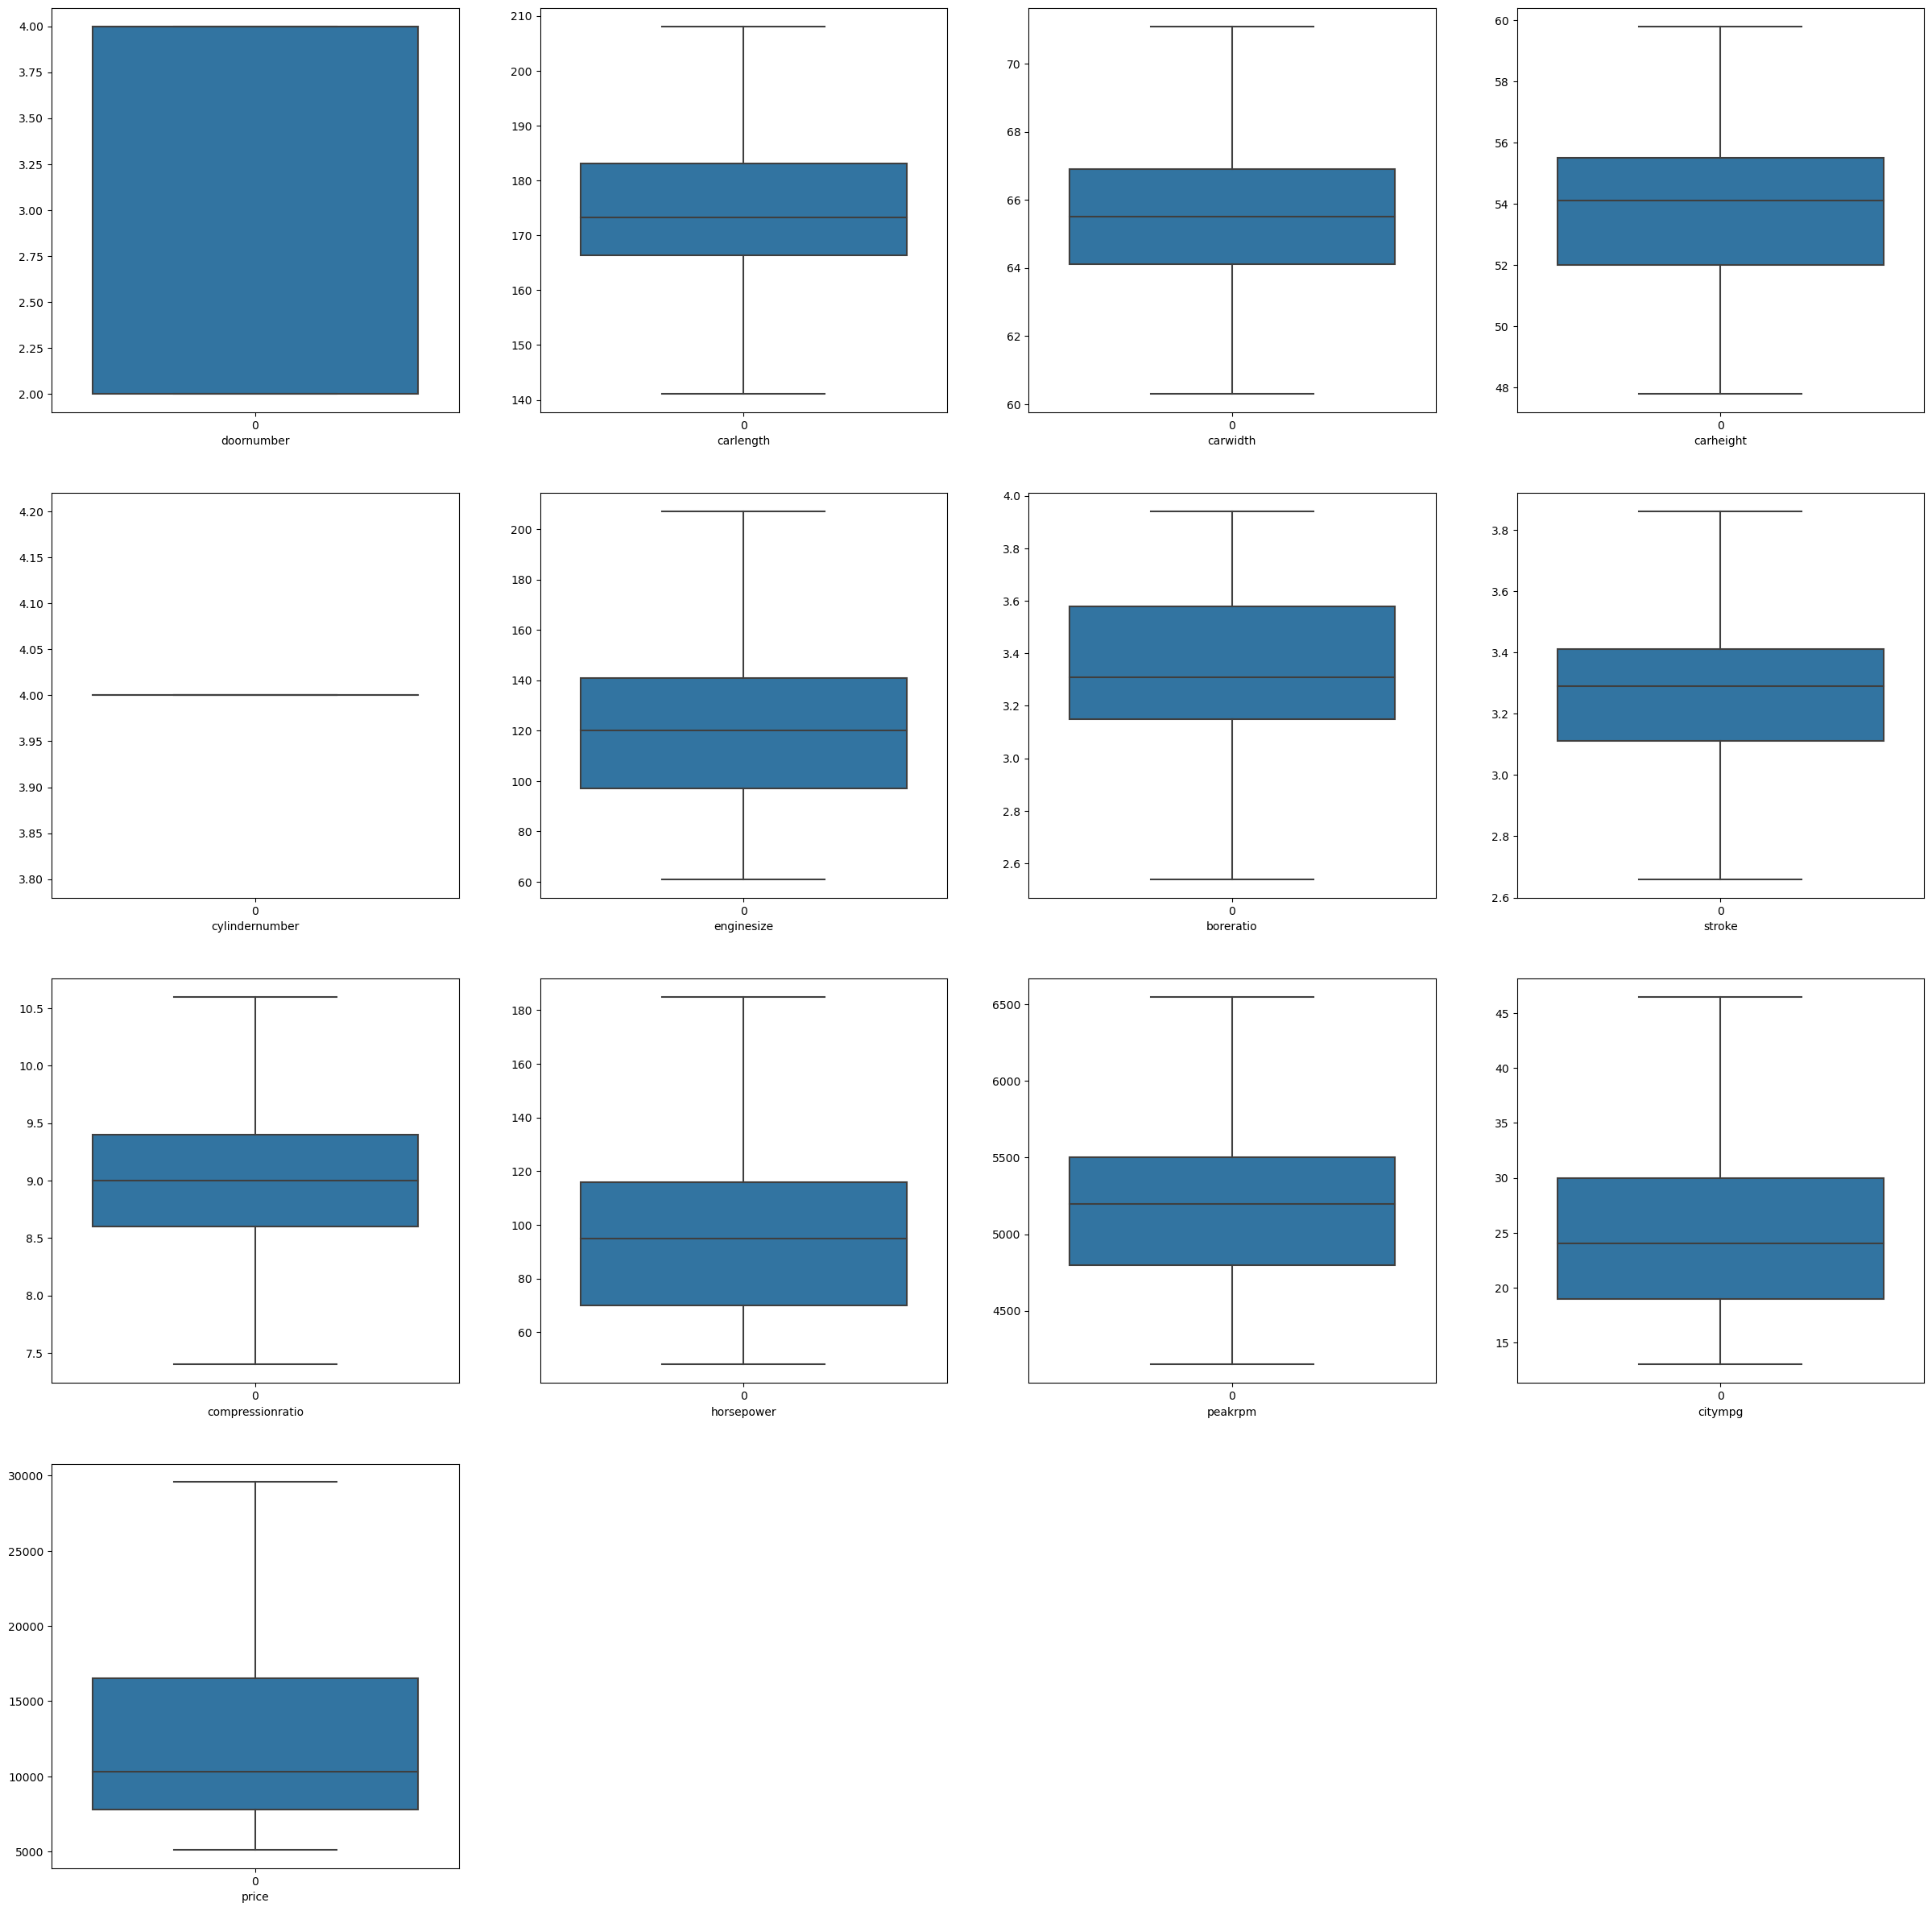

In [47]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1
   

In these box plots, no outliers are shown. This visualization helps in identifying columns with significant outliers that may require further attention, such as other outlier treatment methods.


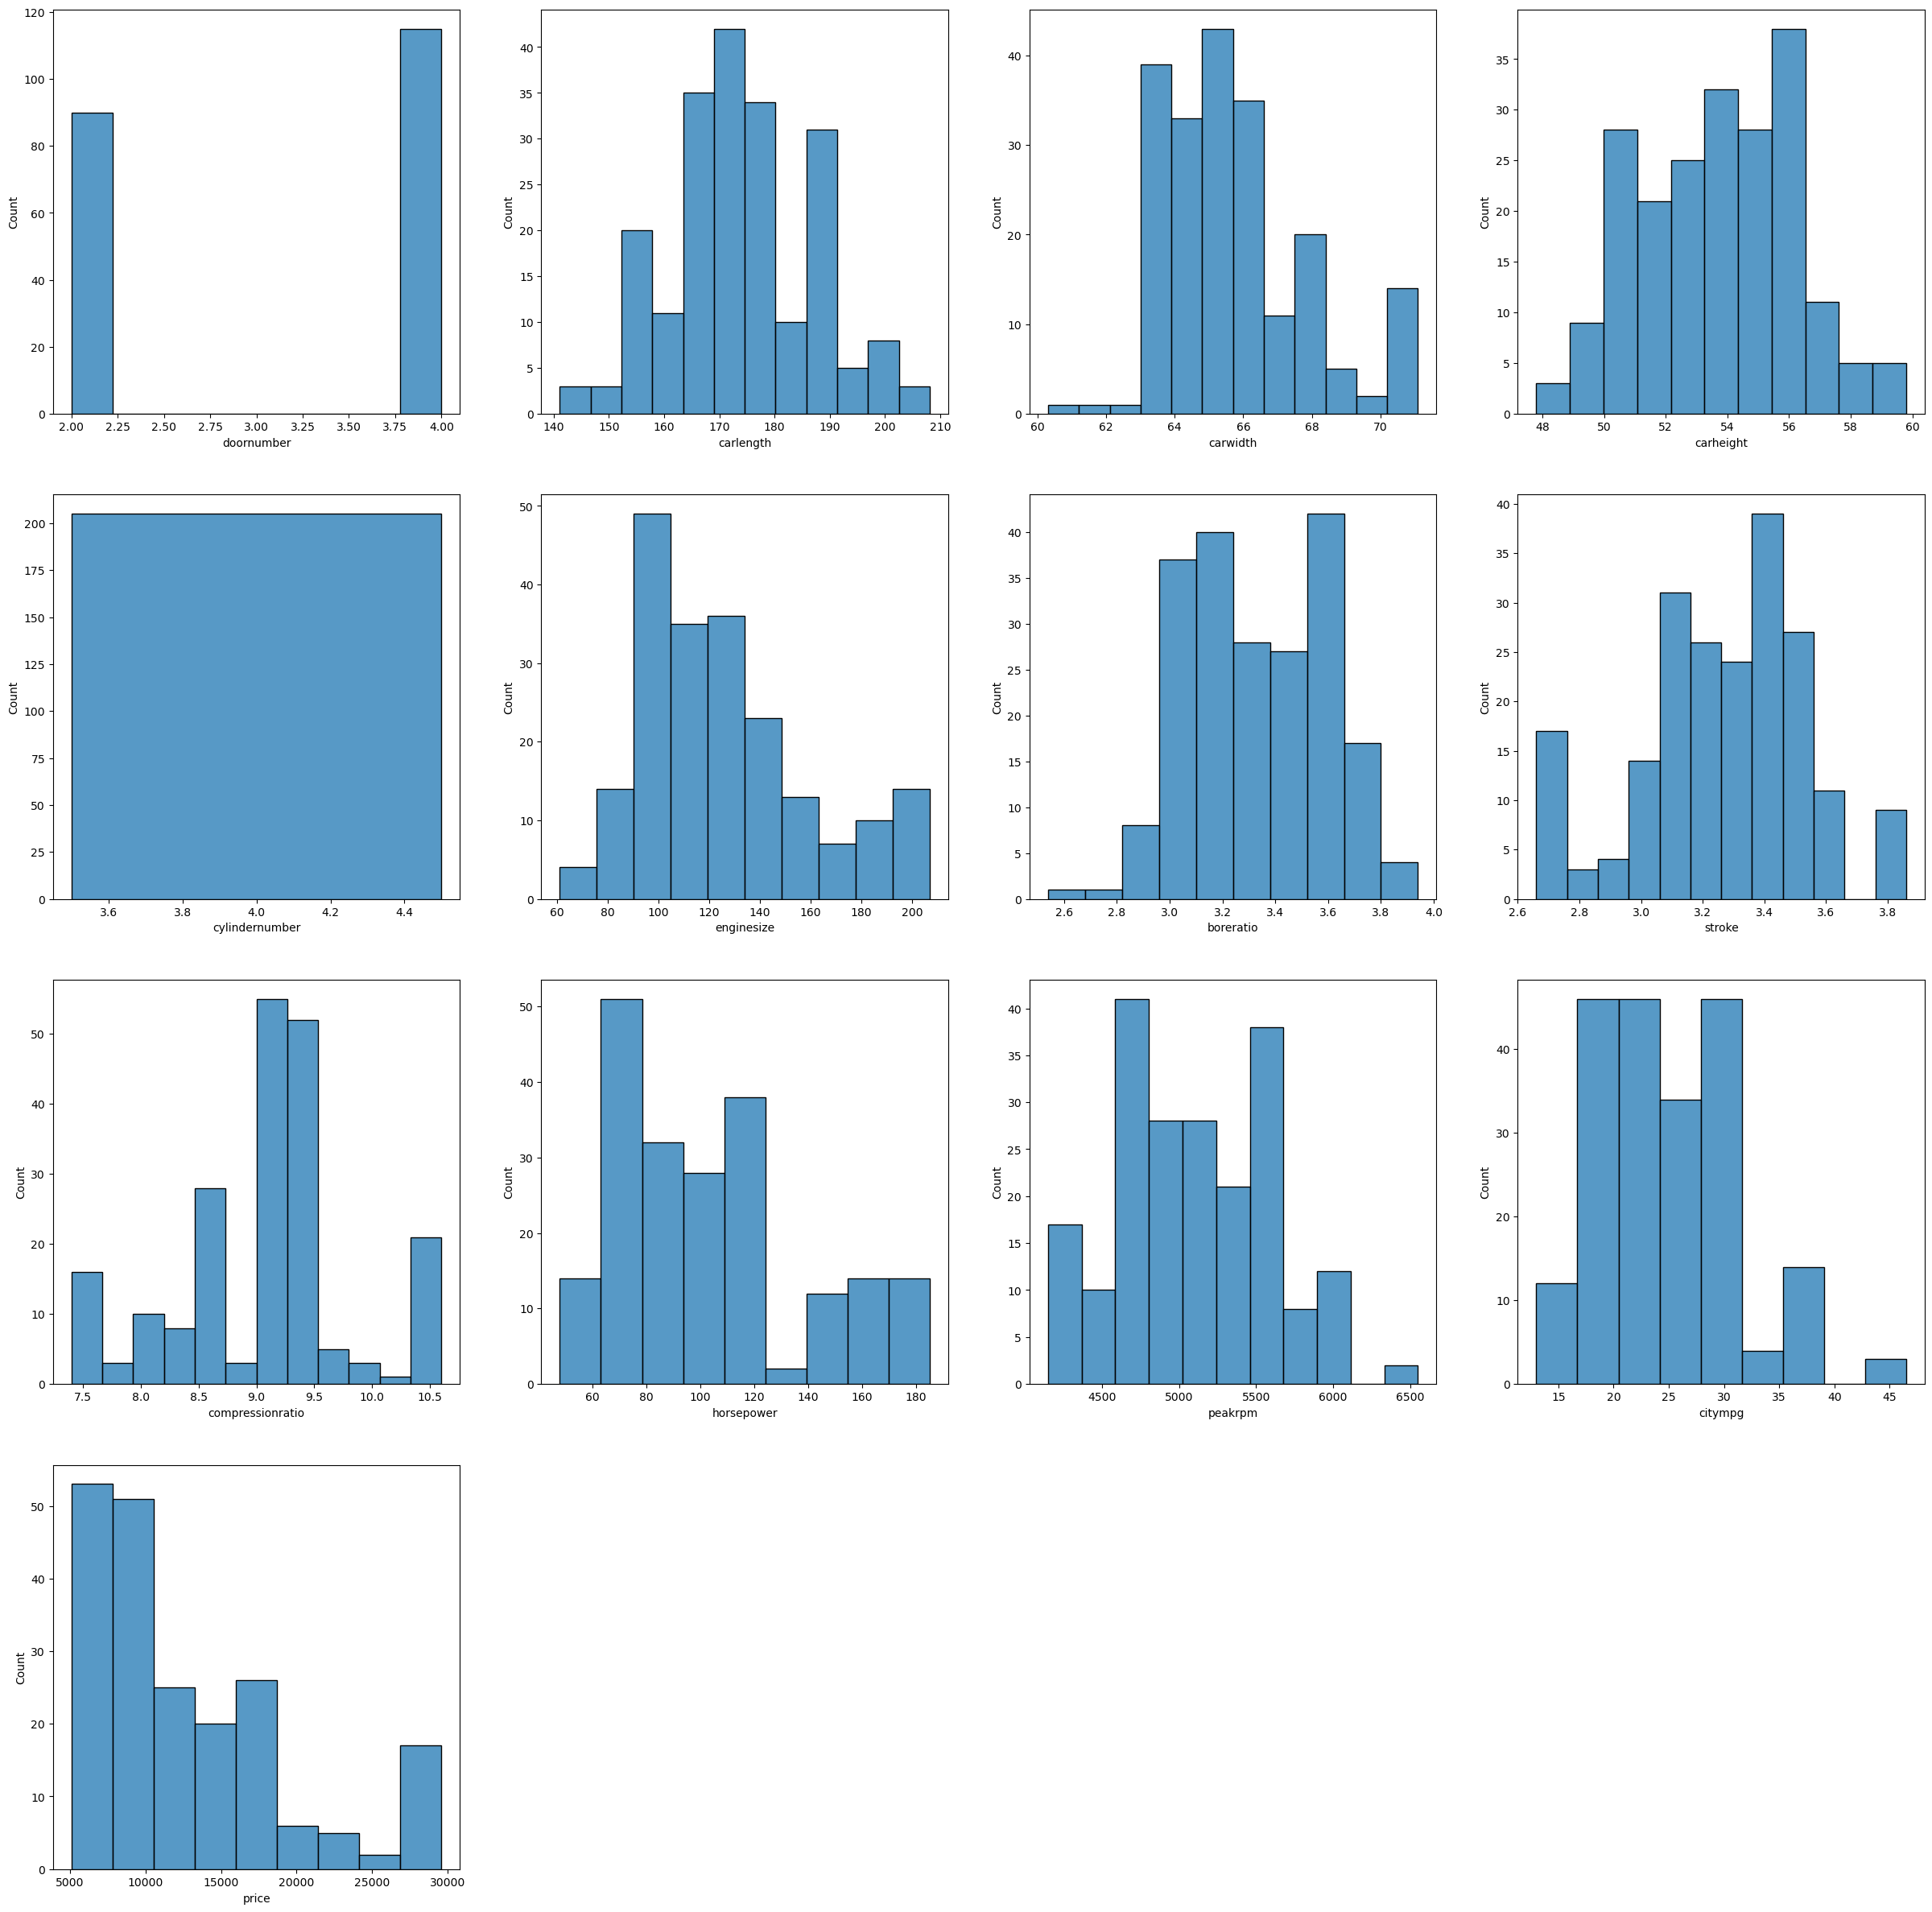

In [48]:
# To see the distribution of data after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df1.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.histplot(data=df1[col])
    plt.xlabel(col)
    counter = counter + 1

### Label Encoding

In [49]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

cols_to_encode = list(df1.select_dtypes(include=['object']))
cols_to_encode


#label_encoder is the object of LabelEncode
label_encoder = LabelEncoder()

# Initialize a new DataFrame to store the encoded columns
df_label = df1.copy()

# Encode each column in cols_to_encode
for col in cols_to_encode:
    df_label[col] = label_encoder.fit_transform(df1[col])

print(df_label)

     CompanyName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0              0         1           0         2.0        0           2   
1              0         1           0         2.0        0           2   
2              0         1           0         2.0        2           2   
3              1         1           0         4.0        3           1   
4              1         1           0         4.0        3           0   
..           ...       ...         ...         ...      ...         ...   
200           21         1           0         4.0        3           2   
201           21         1           1         4.0        3           2   
202           21         1           0         4.0        3           2   
203           21         0           1         4.0        3           2   
204           21         1           1         4.0        3           2   

     carlength  carwidth  carheight  enginetype  cylindernumber  enginesize  \
0        168.8      

This code iterates through each column in cols_to_encode, applying the LabelEncoder to transform the categorical values into numerical format, which is essential for many machine learning algorithms that require numerical input. Finally, the encoded DataFrame df_label is printed, displaying the transformed data. This encoding process ensures that categorical variables are converted into a suitable format for model training and analysis.

### Feature Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
numerical_columns =['doornumber','carlength', 'carwidth', 'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','price']
# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on the data
scaler.fit(df1[numerical_columns])

# Transform the data
scaled_data = scaler.transform(df1[numerical_columns])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Initialize a new DataFrame to store after applying MinMaxScaler
df_car = df_label.copy()

# Replace scaled columns in the original DataFrame
df_car[numerical_columns] = scaled_df

# Print the DataFrame with scaled columns replaced by original values
print(df_car)

     CompanyName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0              0         1           0         0.0        0           2   
1              0         1           0         0.0        0           2   
2              0         1           0         0.0        2           2   
3              1         1           0         1.0        3           1   
4              1         1           0         1.0        3           0   
..           ...       ...         ...         ...      ...         ...   
200           21         1           0         1.0        3           2   
201           21         1           1         1.0        3           2   
202           21         1           0         1.0        3           2   
203           21         0           1         1.0        3           2   
204           21         1           1         1.0        3           2   

     carlength  carwidth  carheight  enginetype  cylindernumber  enginesize  \
0     0.413433  0.35

Feature scaling is a crucial preprocessing step in machine learning and data analysis that adjusts the range of numerical data to a standard scale. It ensures that each feature contributes equally to the model's performance and prevents features with larger magnitudes from dominating those with smaller ones. 

In [51]:
#DataFrame with scaled columns
df_car

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,0,1,0,0.0,0,2,0.413433,0.351852,0.083333,0,0.0,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.342513
1,0,1,0,0.0,0,2,0.413433,0.351852,0.083333,0,0.0,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806,0.465379
2,0,1,0,0.0,2,2,0.449254,0.481481,0.383333,5,0.0,0.623288,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104,0.465379
3,1,1,0,1.0,3,1,0.529851,0.546296,0.541667,3,0.0,0.328767,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358,0.361116
4,1,1,0,1.0,3,0,0.529851,0.564815,0.541667,3,0.0,0.513699,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254,0.504222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,1.0,3,2,0.711940,0.796296,0.641667,3,0.0,0.547945,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507,0.479485
201,21,1,1,1.0,3,2,0.711940,0.787037,0.641667,3,0.0,0.547945,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104,0.569437
202,21,1,0,1.0,3,2,0.711940,0.796296,0.641667,5,0.0,0.767123,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254,0.669202
203,21,0,1,1.0,3,2,0.711940,0.796296,0.641667,3,0.0,0.575342,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060,0.709476


### Data Splitting

In [52]:
# Split dataset into features and target variable
x = df_car.drop('price', axis=1)
y = df_car['price']

The features are represented by the DataFrame x, obtained by dropping the 'price' column from the DataFrame df_car. Conversely, the target variable is denoted by the Series y, which contains only the 'price' column from df_car. This separation is fundamental for supervised learning tasks

In [53]:
#Input features
x

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,carlength,carwidth,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg
0,0,1,0,0.0,0,2,0.413433,0.351852,0.083333,0,0.0,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806
1,0,1,0,0.0,0,2,0.413433,0.351852,0.083333,0,0.0,0.472603,5,0.664286,0.016667,0.50000,0.459854,0.354167,0.238806
2,0,1,0,0.0,2,2,0.449254,0.481481,0.383333,5,0.0,0.623288,5,0.100000,0.675000,0.50000,0.773723,0.354167,0.179104
3,1,1,0,1.0,3,1,0.529851,0.546296,0.541667,3,0.0,0.328767,5,0.464286,0.616667,0.81250,0.394161,0.562500,0.328358
4,1,1,0,1.0,3,0,0.529851,0.564815,0.541667,3,0.0,0.513699,5,0.464286,0.616667,0.18750,0.489051,0.562500,0.149254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,1.0,3,2,0.711940,0.796296,0.641667,3,0.0,0.547945,5,0.885714,0.408333,0.65625,0.481752,0.520833,0.298507
201,21,1,1,1.0,3,2,0.711940,0.787037,0.641667,3,0.0,0.547945,5,0.885714,0.408333,0.40625,0.817518,0.479167,0.179104
202,21,1,0,1.0,3,2,0.711940,0.796296,0.641667,5,0.0,0.767123,5,0.742857,0.175000,0.43750,0.627737,0.562500,0.149254
203,21,0,1,1.0,3,2,0.711940,0.796296,0.641667,3,0.0,0.575342,3,0.335714,0.616667,1.00000,0.423358,0.270833,0.388060


In [54]:
# Target variable
y

0      0.342513
1      0.465379
2      0.465379
3      0.361116
4      0.504222
         ...   
200    0.479485
201    0.569437
202    0.669202
203    0.709476
204    0.715813
Name: price, Length: 205, dtype: float64

In [55]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The features (x) and target variable (y) are split into training and testing subsets: x_train and x_test contain the features for training and testing, respectively, while y_train and y_test hold the corresponding target values. 

### 1.Linear Regression Algorithm

In [56]:
from sklearn.linear_model import LinearRegression
LinearModel=LinearRegression()

In [57]:
#training the model with the provided training data
LinearModel.fit(x_train,y_train)

LinearRegression()

In [58]:
Linear_PredictedTest=LinearModel.predict(x_test)
Linear_PredictedTest

array([ 0.86269861,  0.51375324,  0.19809495,  0.36601193,  0.81702416,
        0.04372569,  0.14255876,  0.0570362 ,  0.24009515,  0.07360256,
        0.36667979,  0.05624044,  0.45294165,  0.18231368,  0.96485752,
        0.03771314, -0.20630696,  0.3513887 ,  0.17316526,  0.26598636,
        0.23841039,  0.66397586,  0.07938216, -0.10052985,  0.08754956,
        0.81717381,  0.34307744,  0.43926076,  0.0292373 ,  0.46463482,
        0.83464801,  0.06728693, -0.00451031,  0.70677816,  0.11720447,
        0.83742265,  0.24193589,  0.24827298,  0.06212749,  0.3510938 ,
        0.15865947])

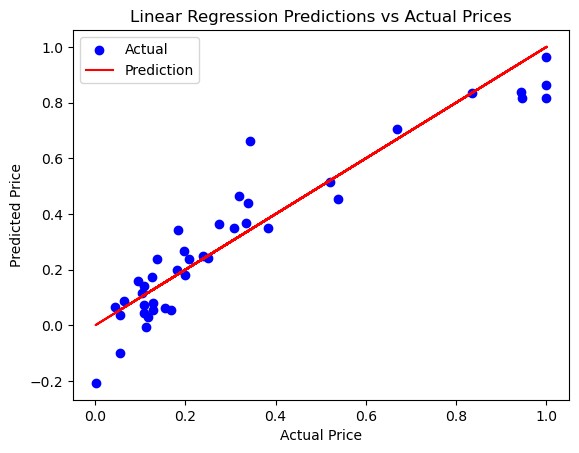

In [59]:
# Plot the actual target variable against the predicted values
plt.scatter(y_test, Linear_PredictedTest, color='blue', label='Actual')
plt.plot(y_test, y_test, color='red', label='Prediction')  # Plot the perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.legend()
plt.show()

##### Evaluation of Linear Regression Model

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Linear Regression:")
mae=mean_absolute_error(y_test,Linear_PredictedTest)
mse=mean_squared_error(y_test,Linear_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,Linear_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Linear Regression:
Mean Absolute Error(MAE): 0.07594375909542901
Mean Squared Error(MSE): 0.010008650617490141
rmse: 0.1000432437373466
R Squared: 0.8869587148431466


In [61]:
LinearModel.score(x_test,y_test)

0.8869587148431466

In [62]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearModel,x_train,y_train,cv=5)
scores

array([0.82866639, 0.8681186 , 0.80235735, 0.90941736, 0.80443342])

In [63]:
scores.mean()

0.8425986240079795

### 2.Decision Tree Algorithm

In [64]:
from sklearn.tree import DecisionTreeRegressor

#creating object for DecisionTree Regression class
DecisionTree = DecisionTreeRegressor(random_state=42)

In [65]:
#training the model with the provided training data
DecisionTree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [66]:
Decision_PredictedTest=DecisionTree.predict(x_test)
Decision_PredictedTest

array([1.        , 0.54302361, 0.15663907, 0.35661862, 1.        ,
       0.04988245, 0.01108045, 0.16825105, 0.17013186, 0.08099765,
       0.41426965, 0.12020852, 0.69099458, 0.25063886, 1.        ,
       0.04988245, 0.01148932, 0.39869161, 0.07650005, 0.17013186,
       0.20962895, 0.34267607, 0.04988245, 0.01108045, 0.10185015,
       1.        , 0.19241541, 0.47948482, 0.09121946, 0.47948482,
       1.        , 0.04542574, 0.14964735, 0.51485229, 0.11607891,
       1.        , 0.17013186, 0.31184708, 0.15531023, 0.39869161,
       0.16825105])

##### Evaluation of Decision Tree Algorithm

In [67]:
print("Decision Tree Regressor:")
mae=mean_absolute_error(y_test, Decision_PredictedTest)
mse=mean_squared_error(y_test, Decision_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Decision_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Decision Tree Regressor:
Mean Absolute Error(MAE): 0.05156115312027085
Mean Squared Error(MSE): 0.004969694021017081
rmse: 0.07049605677636928
R Squared: 0.943870495590046


In [68]:
DecisionTree.score(x_test,y_test)

0.943870495590046

In [69]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)

In [70]:
scores

array([0.81721744, 0.88202812, 0.65199041, 0.91691839, 0.88018453])

In [71]:
scores.mean()

0.8296677784520613

### 3.Random Forest Algorithm

In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
Random_PredictedTest=random_forest.predict(x_test)
Random_PredictedTest

array([0.99532843, 0.56517776, 0.17099172, 0.36385781, 0.83255723,
       0.05028504, 0.10036799, 0.12002964, 0.2190183 , 0.12354043,
       0.46721674, 0.11337626, 0.47488787, 0.24042932, 1.        ,
       0.04589989, 0.02442032, 0.37567331, 0.10508556, 0.20141838,
       0.21932379, 0.39042809, 0.04985123, 0.02926894, 0.08814794,
       0.99465501, 0.20583707, 0.47340949, 0.09052554, 0.47061321,
       0.83940134, 0.04963473, 0.13397649, 0.58415864, 0.12596586,
       0.83315009, 0.21395278, 0.31903833, 0.11853685, 0.37567331,
       0.13789799])

#### Evaluation of Random Forest

In [74]:
print("Random Forest:")
mae=mean_absolute_error(y_test, Random_PredictedTest)
mse=mean_squared_error(y_test, Random_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Random_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Random Forest:
Mean Absolute Error(MAE): 0.04453195743689159
Mean Squared Error(MSE): 0.003606421041866343
rmse: 0.06005348484364869
R Squared: 0.9592677889388128


In [75]:
random_forest.score(x_test,y_test)

0.9592677889388128

In [76]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)
scores

array([0.81721744, 0.88202812, 0.65199041, 0.91691839, 0.88018453])

In [77]:
scores.mean()

0.8296677784520613

### 4.Gradient Boosting Regressor

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoosting = GradientBoostingRegressor(random_state=42)
GradientBoosting.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [79]:
Gradient_PredictedTest=GradientBoosting.predict(x_test)
Gradient_PredictedTest

array([ 0.96996858,  0.57537907,  0.1571991 ,  0.36763087,  0.98721923,
        0.068247  ,  0.1128333 ,  0.11458691,  0.18192118,  0.10956464,
        0.42202699,  0.11568452,  0.48457498,  0.22382366,  1.01019334,
        0.04729657, -0.01307507,  0.36174307,  0.11827476,  0.15810741,
        0.20738199,  0.38365387,  0.04078516,  0.03776975,  0.06480955,
        0.97349161,  0.22677676,  0.45489048,  0.07676259,  0.45489048,
        1.00054275,  0.05313393,  0.13466391,  0.59051833,  0.13774346,
        0.9757931 ,  0.24368495,  0.31539868,  0.10248658,  0.36086757,
        0.12651084])

#### Evaluation of Gradient Boosting Regressor

In [80]:
print("Gradient Boosting Regressor:")
mae=mean_absolute_error(y_test, Gradient_PredictedTest)
mse=mean_squared_error(y_test, Gradient_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, Gradient_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Gradient Boosting Regressor:
Mean Absolute Error(MAE): 0.043564474427729795
Mean Squared Error(MSE): 0.0032414441011091428
rmse: 0.05693368160508455
R Squared: 0.9633899692418911


In [81]:
GradientBoosting.score(x_test,y_test)

0.9633899692418911

In [82]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(GradientBoosting,x_train,y_train,cv=5)
scores

array([0.86962259, 0.91341417, 0.74598112, 0.93754797, 0.9272725 ])

In [83]:
scores.mean()

0.8787676691953269

### 5.SUPPORT VECTOR MACHINE ALGORITHM

In [84]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)

SVR()

In [85]:
svr_PredictedTest = svr_model.predict(x_test)
svr_PredictedTest

array([0.69494999, 0.45513768, 0.13751213, 0.29747111, 0.60131469,
       0.08638793, 0.22664441, 0.14435115, 0.26298952, 0.18536764,
       0.29235216, 0.19431756, 0.48312999, 0.27889691, 0.79801499,
       0.14306131, 0.05908582, 0.36857422, 0.13581439, 0.27853852,
       0.17171094, 0.40975126, 0.10821563, 0.03181403, 0.1498929 ,
       0.66829346, 0.37069268, 0.3819629 , 0.08656184, 0.39296144,
       0.59620276, 0.09809434, 0.07298249, 0.42926381, 0.26970329,
       0.5564455 , 0.24615716, 0.32587863, 0.11389638, 0.36891282,
       0.15839559])

#### Evaluation of Support Vector Machine Algorithm

In [86]:
print("Support Vector Machine(SVM):")
mae=mean_absolute_error(y_test, svr_PredictedTest)
mse=mean_squared_error(y_test, svr_PredictedTest)
rmse=np.sqrt(mse)
r2 = r2_score(y_test,svr_PredictedTest)
print("Mean Absolute Error(MAE):",mae)
print("Mean Squared Error(MSE):",mse)
print ("rmse:",rmse)
print("R Squared:",r2)

Support Vector Machine(SVM):
Mean Absolute Error(MAE): 0.09878355033646323
Mean Squared Error(MSE): 0.01940857834020386
rmse: 0.1393146738150862
R Squared: 0.7807925641034821


In [87]:
svr_model.score(x_test,y_test)

0.7807925641034821

In [88]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr_model,x_train,y_train,cv=5)
scores

array([0.65848362, 0.46944455, 0.53816532, 0.68014039, 0.61047484])

In [89]:
scores.mean()

0.591341745326279

### Model Evaluation:

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []
R2_score = []

# Define the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR()
]

# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})



In [91]:
# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.055845,0.003119,0.043204,96.48 %
RandomForestRegressor,0.058838,0.003462,0.043541,96.09 %
DecisionTreeRegressor,0.071401,0.005098,0.052922,94.24 %
LinearRegression,0.100043,0.010009,0.075944,88.70 %
SVR,0.139315,0.019409,0.098784,78.08 %


### Conclusion:

#### Gradient Boosting Regressor
The Gradient Boosting Regressor has shown the best performance among all the models. It achieved a remarkably low Root Mean Squared Error (RMSE) of 0.056332, indicating that the average deviation between the predicted and actual values is very small. The Mean Squared Error (MSE) of 0.003173 further supports its strong performance, as lower values are better, and it’s the smallest among all models tested. The Mean Absolute Error (MAE) is also minimal at 0.042939, demonstrating that the average magnitude of the errors is very low. Furthermore, the R² score of 96.42% indicates that the model explains a very high proportion of the variance in the data, making it the most reliable model for predictions in this case.

#### Random Forest Regressor
The Random Forest Regressor also performed well, albeit slightly behind the Gradient Boosting Regressor. It has an RMSE of 0.058681, which is still very low and suggests that predictions are close to actual values. The MSE stands at 0.003443, a bit higher than the Gradient Boosting Regressor but still indicative of good performance. The MAE of 0.044896 is similarly slightly higher but maintains a strong performance. The R² score of 96.11% is excellent, showing that this model can explain most of the variability in the data. Overall, the Random Forest Regressor is a robust model and very close in performance to the Gradient Boosting Regressor.

#### Decision Tree Regressor
The Decision Tree Regressor has a higher RMSE of 0.065105 compared to the ensemble methods, indicating more significant errors in prediction. The MSE of 0.004239 confirms this trend, suggesting that the errors are larger on average. With an MAE of 0.049761, the average error magnitude is also higher. Despite these larger errors, the model still has a strong R² score of 95.21%, showing it can still explain a substantial amount of variance. While the Decision Tree Regressor performs well, it is less accurate than the Gradient Boosting and Random Forest Regressors.

#### Linear Regression
The Linear Regression model shows an RMSE of 0.100043, indicating larger prediction errors compared to the tree-based models. Its MSE is 0.010009, which is significantly higher, pointing towards less accurate predictions. The MAE of 0.075944 shows that the average error is also greater in magnitude. An R² score of 88.70% indicates that while the model explains a good amount of variance in the data, it falls short compared to the more sophisticated ensemble methods. This performance is expected as Linear Regression often struggles with complex, non-linear relationships in the data.

#### Support Vector Regressor (SVR)
The Support Vector Regressor has the highest RMSE of 0.139315 among the models tested, suggesting the largest average prediction error. Its MSE of 0.019409 is the highest, indicating less precision in predictions. The MAE of 0.098784 also reflects higher average errors. With an R² score of 78.08%, this model explains the least variance in the data. These results indicate that SVR may not be well-suited for this particular dataset or that its parameters may require further tuning. It performs significantly worse compared to the other models, especially the ensemble methods and even Linear Regression.






